In [2]:
import gym

In [4]:
env = gym.make('FrozenLake-v1')

In [6]:
env.observation_space #since we are in a MDP, observation is simply state space

Discrete(16)

In [9]:
env.action_space #four actions, corresponding to n,s,e,w

Discrete(4)

In [151]:
env.reset() #resets location back to zero - top left corner
env.step(2) #steps in "right" direction
env.render() #renders "image" of game

env.step(2)
#outputs new state, reward, done, debugging dictionary


  (Right)
SFFF
FHFH
FFFH
HFFG


(2, 0.0, False, {'prob': 1.0})

In [156]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v1',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
)
env = gym.make('FrozenLakeNotSlippery-v1')
env.reset()

#create new environment, with non-slippery tile

0

In [157]:
env.reset()
done = False
while not done:
    #env.render()
    action = env.action_space.sample()
    _, _, done, _ = env.step(action)
#env.render()

#random movements don't really get us to the goal

In [158]:
import numpy as np
#Initialize table with all zeros to be uniform
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Learning parameters
alpha = 0.1   #Q-learning learning rate
gamma = 0.95  #discount rate for future rewards
num_episodes = 2000
# array of reward for each episode
rs = np.zeros([num_episodes])

In [159]:
env.reset()
env.step(2)

(1, 0.0, False, {'prob': 1.0})

In [162]:
for i in range(num_episodes):
    s = env.reset() #reset environment and get first observation
    
    done = False
    t = 0
    r_sum_i = 0
    
    while not done:
        #choose action (with randomness) from Q table, as time goes on, less randomness 
        action = np.argmax(Q[s,:] + np.random.randn(1, env.action_space.n)*(1./(i/10+1)))
        s_next, r, done, _ = env.step(action)
        
        #update Q table with new knowledge
        Q[s,action] = (1 - alpha)*Q[s,action] + alpha*(r + gamma*np.max(Q[s_next,:]))
        
        #add reward to episode total
        r_sum_i += r*gamma**t
        
        #update state and time
        s = s_next
        t += 1
    rs[i] = r_sum_i
    
    

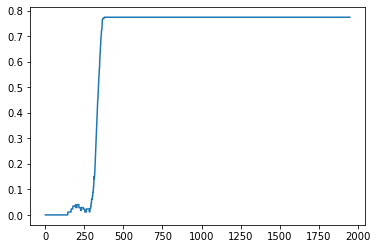

In [165]:
## Plot reward vs episodes
import matplotlib.pyplot as plt
# Sliding window average
r_cumsum = np.cumsum(np.insert(rs, 0, 0)) 
r_cumsum = (r_cumsum[50:] - r_cumsum[:-50]) / 50
# Plot
plt.plot(r_cumsum)
plt.show()

In [169]:
# Print number of times the goal was reached
N = len(rs)//10
num_Gs = np.zeros(10)
for i in range(10):
    num_Gs[i] = np.sum(rs[i*N:(i+1)*N] > 0)
    
print("Rewards: {0}".format(num_Gs))

Rewards: [  1.  53. 200. 200. 200. 200. 200. 200. 200. 200.]


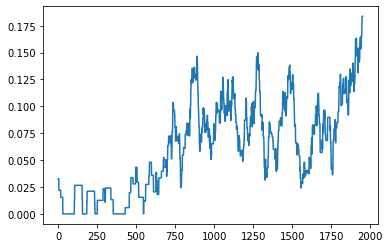

Rewards: [ 5.  5.  5. 21. 44. 54. 46. 43. 38. 74.]


In [173]:
env = gym.make('FrozenLake-v1')

#Initialize table with all zeros to be uniform
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Learning parameters
alpha = 0.1
gamma = 0.95
num_episodes = 2000

# array of reward for each episode
rs = np.zeros([num_episodes])

for i in range(num_episodes):
    # Set total reward and time to zero, done to False
    r_sum_i = 0
    t = 0
    done = False
    
    #Reset environment and get first new observation
    s = env.reset()
    
    while not done:
        # Choose an action by greedily (with noise) from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1, env.action_space.n)*(1./(i/10+1)))
        
        # Get new state and reward from environment
        s1, r, done, _ = env.step(a)
        
        # Update Q-Table with new knowledge
        Q[s,a] = (1 - alpha)*Q[s,a] + alpha*(r + gamma*np.max(Q[s1,:]))
        
        # Add reward to episode total
        r_sum_i += r*gamma**t
        
        # Update state and time
        s = s1
        t += 1
    rs[i] = r_sum_i
    
## Plot reward vs episodes
# Sliding window average
r_cumsum = np.cumsum(np.insert(rs, 0, 0)) 
r_cumsum = (r_cumsum[50:] - r_cumsum[:-50]) / 50

# Plot
plt.plot(r_cumsum)
plt.show()

# Print number of times the goal was reached
N = len(rs)//10
num_Gs = np.zeros(10)

for i in range(10):
    num_Gs[i] = np.sum(rs[i*N:(i+1)*N] > 0)
    
print("Rewards: {0}".format(num_Gs))